<a href="https://colab.research.google.com/github/JoeArias1982/Machine-Learning-HW3-UT-Austin-/blob/main/HW3p_fve1o0p79i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

# Problem 1

In this problem we will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), one obtains the best rank-$k$ approximation to $M$.

The following code returns the dataset of 400 images.

In [3]:
data = datasets.fetch_olivetti_faces()
images = data.images

(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

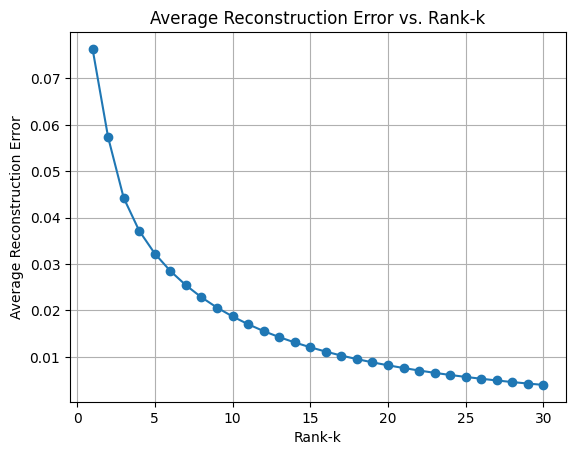

In [4]:
# Returns the best rank-k approximation to M
def svd_reconstruct(M, k):
    U, S, Vt = svd(M, full_matrices=False)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    M_k = U_k @ S_k @ Vt_k
    return M_k

# Function to calculate the mean L1 error
def mean_l1_error(M, A):
    error = np.sum(np.abs(M - A)) / (M.shape[0] * M.shape[1])
    return error

# Initialize a list to store the average errors for each k
average_errors = []

# Calculate the average errors for k from 1 to 30
for k in range(1, 31):
    errors = [mean_l1_error(image, svd_reconstruct(image, k)) for image in images]
    average_errors.append(np.mean(errors))

# Plot the average errors as a function of k
plt.plot(range(1, 31), average_errors, marker='o')
plt.xlabel('Rank-k')
plt.ylabel('Average Reconstruction Error')
plt.title('Average Reconstruction Error vs. Rank-k')
plt.grid(True)
plt.show()

(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. You will find the `imshow` method in matplotlib useful for this; pass in `cmap='gray'` to render in grayscale. Feel free to play around further.

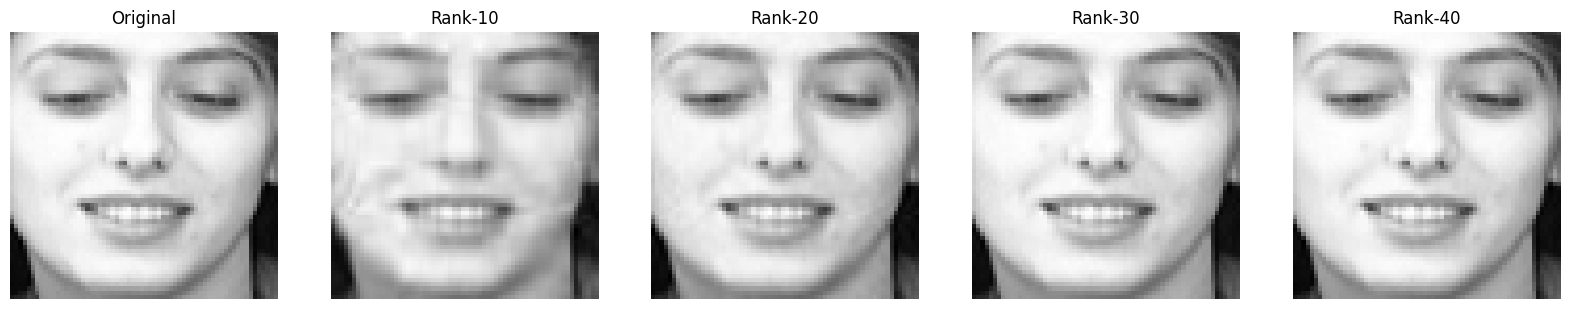

In [10]:
# Function to reconstruct an image using its SVD and a specified rank k
def svd_reconstruct(M, k):
    U, S, Vt = np.linalg.svd(M, full_matrices=False)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    M_k = U_k @ S_k @ Vt_k
    return M_k

# Load the Olivetti faces dataset
images = data.images

# Select an image for demonstration
image_to_display = images[72] #This is my H.S. Football Jersey Number LOL!!!!

# Define k values for the approximations
k_values = [10, 20, 30, 40]

# Setup the plot
plt.figure(figsize=(20, 4))

# Display the original image
plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(image_to_display, cmap='gray')
plt.title('Original')
plt.axis('off')

# Display the best rank-k approximations
for index, k in enumerate(k_values, start=2):
    approx_image = svd_reconstruct(image_to_display, k)
    plt.subplot(1, len(k_values) + 1, index)
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'Rank-{k}')
    plt.axis('off')

plt.show()


# Problem 2

In this problem we visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. You may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. You should do this in two ways:
1. By using SVD directly. Do not use any PCA built-ins.
2. By using `sklearn.decomposition.PCA`.

The two approaches should give exactly the same result, and this also acts as a check. (But note that the signs of the singular vectors may be flipped in the two approaches since singular vectors are only determined uniquely up to sign. If this happens, flip signs to make everything identical again.)

Your final goal is to make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign). Do this for both approaches. Your plots should be identical. Does the data look roughly separable already in 2 dimensions?

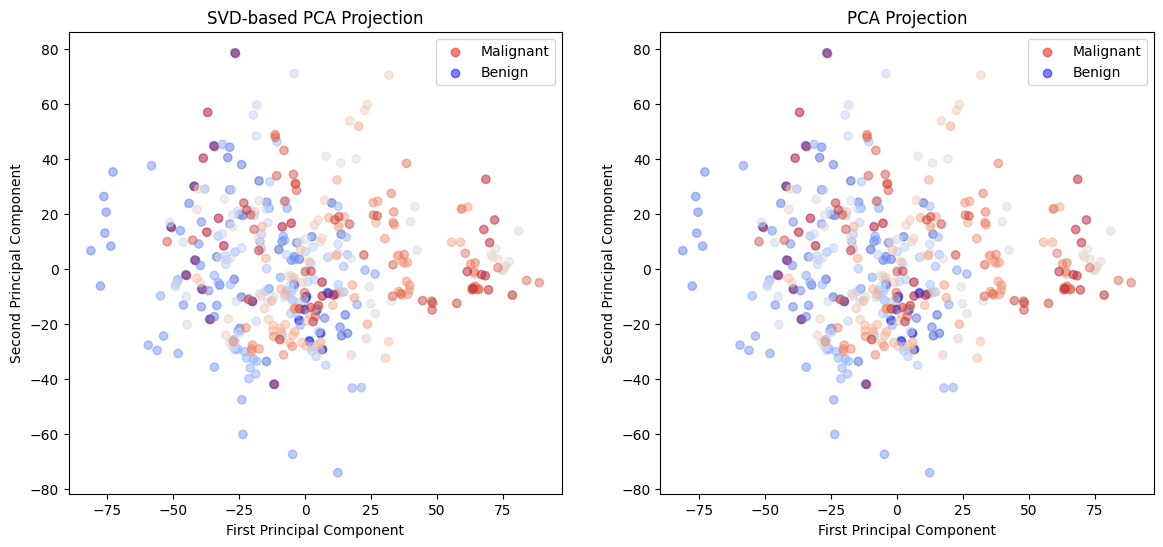

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


cancer = datasets.load_breast_cancer()
X = data.data
y = data.target

# Rescale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute SVD
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)

# Top two principal components
PCs_svd = Vt[:2, :]

# Compute PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Principal components are in pca.components_
PCs_pca = pca.components_

# Scatterplot for SVD-based projections
X_proj_svd = X_scaled @ PCs_svd.T

# Adjust signs if necessary to match PCA
if np.sign(PCs_svd[0,0]) != np.sign(PCs_pca[0,0]):
    X_proj_svd[:, 0] = -X_proj_svd[:, 0]
if np.sign(PCs_svd[1,1]) != np.sign(PCs_pca[1,1]):
    X_proj_svd[:, 1] = -X_proj_svd[:, 1]

plt.figure(figsize=(14, 6))

# SVD-based projection scatterplot
plt.subplot(1, 2, 1)
for label, color in zip([0, 1], ['red', 'blue']):
    indices = y == label
    plt.scatter(X_proj_svd[indices, 0], X_proj_svd[indices, 1], c=color, label=('Malignant' if label == 0 else 'Benign'), alpha=0.5)
plt.scatter(X_proj_svd[:, 0], X_proj_svd[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('SVD-based PCA Projection')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

# PCA-based projection scatterplot
plt.subplot(1, 2, 2)
for label, color in zip([0, 1], ['red', 'blue']):
    indices = y == label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], c=color, label=('Malignant' if label == 0 else 'Benign'), alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.show()



From these visualizations, it appears that the data is roughly separable into two groups based on the first two principal components. This suggests that even in a reduced dimensionality space, there's a distinguishable pattern that relates to the diagnosis, indicating the effectiveness of PCA for dimensionality reduction and visualization in this context.